In [1]:
import numpy as np
import random
from tqdm import trange
import matplotlib.pyplot as plt

from mino import AdaptiveMinorityGame, BasicMinorityGame

In [2]:
N, M, K = 1000+1, 5, 4
# N: number of players
# M: length of memory
# K: strategy space for each player

T_SIMU = 10000

In [3]:
# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='bestpair', rescoring_method='local')

# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='random', rescoring_method='global')

# 上面是2个crossover_method 和 rescoring_method 的示例

# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=12, worst_proportion=0.1)
# g = BasicMinorityGame(num_agent=N, brain_size=M, strat_choices=K)

games = []
m_list = [3,4,5,6,7,8,9,10,11]
for m in m_list:
    # games.append(BasicMinorityGame(num_agent=N, brain_size=m, strat_choices=K))
    games.append(AdaptiveMinorityGame(num_agent=N, brain_size=m, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='bestpair', rescoring_method='local'))

In [4]:
# attnrec, gamerec = g.simulate(T_SIMU)
attnrecs = []
gamerecs = []
for game in games:
    attnrec, gamerec = game.simulate(T_SIMU)
    attnrecs.append(attnrec)
    gamerecs.append(gamerec)


100%|██████████| 10000/10000 [03:05<00:00, 53.97it/s]


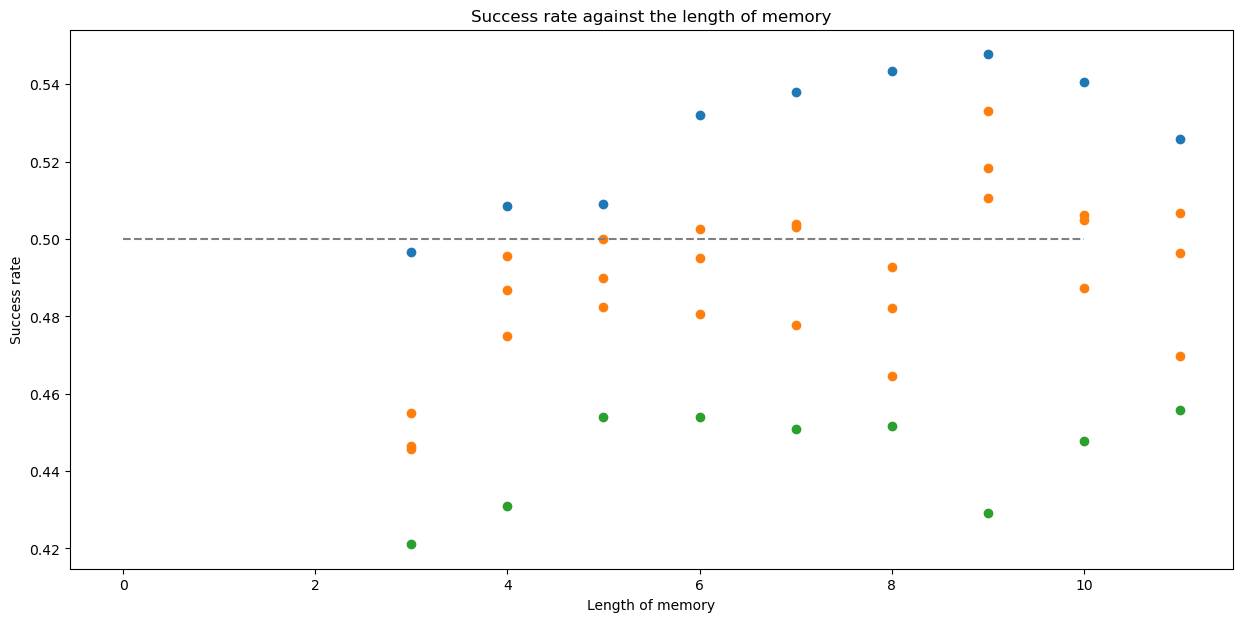

In [5]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0.5, xmin=0, xmax=10, linestyles='dashed', colors='gray')
best_x, mean_x, wors_x, best_y, mean_y, wors_y = [],[],[],[],[],[]
for i in range(len(m_list)):
    gamerec = np.array(gamerecs[i])
    # print(f"i = {i}\ngamerec {gamerec.shape}")
    win_count = np.cumsum(gamerec, axis=0)*1.0
    win_rate = win_count/np.cumsum(np.ones_like(win_count), axis=0)
    # win_rate = win_count
    
    final_round = win_rate[-1, :]
    # print(final_round)
    best_x.append(m_list[i])
    wors_x.append(m_list[i])
    best_y.append(np.max(final_round))
    wors_y.append(np.min(final_round))
    
    mean_x.append(m_list[i])
    mean_y.append(np.random.choice(final_round))
    mean_x.append(m_list[i])
    mean_y.append(np.random.choice(final_round))
    mean_x.append(m_list[i])
    mean_y.append(np.random.choice(final_round))
    

plt.scatter(best_x, best_y, marker = 'o')
plt.scatter(mean_x, mean_y, marker = 'o')
plt.scatter(wors_x, wors_y, marker = 'o')


plt.title('Success rate against the length of memory')
plt.xlabel('Length of memory')
plt.ylabel('Success rate')
plt.show()